<a href="https://colab.research.google.com/github/girlwcode/21-1_machineLearning/blob/main/6_10_%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D%EC%9C%BC%EB%A1%9C%EC%A0%9C%EA%B1%B0%EC%A1%B0%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

프로그램 6-10의 교차 검증으로 제거 조사에서 가장 성능이 좋았던  Data augmentation을 사용하여
CIFAR-10 데이터에 대하여 epoch 수를 100번으로 늘린 상태로
Model accuracy와 Model loss에 대한 그래프와 정확률을 제시해주세요

 
이때, Data augmentation이 적용되어질 width_shift, height_shift, rotation, horizontal_flip, vertical_flip 등의
수치는 자유로이 선택하여 수행해 주세요.

PPT에 본인이 선택한 Daga augmentation을 적용한 파라미터를 기재해 주시고,
수행 결과에서 정확률과 Model accuracy와 Model loss에 대한 그래프를 캡쳐하여 제출해 주시면 됩니다.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers

In [2]:
#CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train),(x_test,y_test)=cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
#하이퍼파라미터 설정
batch_siz = 128
n_epoch = 10
k = 5

rotation_range=5.0, width_shift_range=0.5, height_shift_range=0.5, horizontal_flip=False, vertical_flip=True

In [5]:
#하이퍼 마라미터에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation(data_gen,dropout_rate,l2_reg):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train):
        xtrain,xval = x_train[train_index],x_train[val_index]
        ytrain,yval = y_train[train_index],y_train[val_index]

        #신경망 모델 설계
        cnn = Sequential()
        cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
        cnn.add(Conv2D(32,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[0]))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[1]))
        cnn.add(Flatten())
        cnn.add(Dense(512, activation='relu'))
        cnn.add(Dropout(dropout_rate[2])) 
        cnn.add(Dense(10,activation='softmax',kernel_regularizer=regularizers.l2(l2_reg)))

        #신경망을 학습하고 정확률 평가
        cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
        if data_gen:
            generator = ImageDataGenerator(rotation_range=4.0, width_shift_range=0.8, height_shift_range=0.8, horizontal_flip=True, vertical_flip=False)
            cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz), epochs=n_epoch, validation_data=(x_test,y_test), verbose=2)
        else:
            cnn.fit(xtrain, ytrain,batch_size = batch_siz, epochs=n_epoch, validation_data=(x_test,y_test), verbose=2)
        accuracy.append(cnn.evaluate(xval,yval,verbose=0)[1])
    return accuracy

In [6]:
#하이퍼파라미터를 달리 하며 신경망 모델을 평가
acc_000 = cross_validation(False, [0.0, 0.0, 0.0], 0.0)
acc_001 = cross_validation(False, [0.0, 0.0, 0.0], 0.01)
acc_010 = cross_validation(False, [0.25, 0.25, 0.5], 0.0)
acc_011 = cross_validation(False, [0.25, 0.25, 0.5], 0.01)

Epoch 1/10
313/313 - 36s - loss: 1.5651 - accuracy: 0.4305 - val_loss: 1.2793 - val_accuracy: 0.5353
Epoch 2/10
313/313 - 5s - loss: 1.1611 - accuracy: 0.5886 - val_loss: 1.0637 - val_accuracy: 0.6184
Epoch 3/10
313/313 - 5s - loss: 0.9785 - accuracy: 0.6554 - val_loss: 1.0091 - val_accuracy: 0.6489
Epoch 4/10
313/313 - 5s - loss: 0.8427 - accuracy: 0.7078 - val_loss: 0.8970 - val_accuracy: 0.6847
Epoch 5/10
313/313 - 5s - loss: 0.7359 - accuracy: 0.7431 - val_loss: 0.8371 - val_accuracy: 0.7096
Epoch 6/10
313/313 - 5s - loss: 0.6240 - accuracy: 0.7812 - val_loss: 0.8324 - val_accuracy: 0.7154
Epoch 7/10
313/313 - 5s - loss: 0.5272 - accuracy: 0.8155 - val_loss: 0.8340 - val_accuracy: 0.7284
Epoch 8/10
313/313 - 5s - loss: 0.4267 - accuracy: 0.8480 - val_loss: 0.8603 - val_accuracy: 0.7309
Epoch 9/10
313/313 - 5s - loss: 0.3413 - accuracy: 0.8808 - val_loss: 0.8997 - val_accuracy: 0.7348
Epoch 10/10
313/313 - 5s - loss: 0.2507 - accuracy: 0.9129 - val_loss: 1.0723 - val_accuracy: 0.717

In [7]:
acc_100 = cross_validation(True, [0.0, 0.0, 0.0], 0.0)
acc_101 = cross_validation(True, [0.0, 0.0, 0.0], 0.01)
acc_110 = cross_validation(True, [0.25, 0.25, 0.5], 0.0)
acc_111 = cross_validation(True, [0.25, 0.25, 0.5], 0.01)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
391/391 - 34s - loss: 2.0958 - accuracy: 0.2133 - val_loss: 1.8737 - val_accuracy: 0.3079
Epoch 2/10
391/391 - 33s - loss: 1.9679 - accuracy: 0.2708 - val_loss: 1.7002 - val_accuracy: 0.3601
Epoch 3/10
391/391 - 33s - loss: 1.8929 - accuracy: 0.3019 - val_loss: 1.6452 - val_accuracy: 0.3939
Epoch 4/10
391/391 - 33s - loss: 1.8302 - accuracy: 0.3226 - val_loss: 1.5775 - val_accuracy: 0.4236
Epoch 5/10
391/391 - 33s - loss: 1.7827 - accuracy: 0.3457 - val_loss: 1.4336 - val_accuracy: 0.4774
Epoch 6/10
391/391 - 33s - loss: 1.7449 - accuracy: 0.3618 - val_loss: 1.4661 - val_accuracy: 0.4572
Epoch 7/10
391/391 - 33s - loss: 1.7098 - accuracy: 0.3739 - val_loss: 1.3878 - val_accuracy: 0.5001
Epoch 8/10
391/391 - 33s - loss: 1.6748 - accuracy: 0.3906 - val_loss: 1.3270 - val_accuracy: 0.5253
Epoch 9/10
391/391 - 35s - loss: 1.6598 - accuracy: 0.3986 - val_loss: 1.2657 - val_accuracy: 0.5431
Epoch 10/10
391/391 - 34s - loss: 1.6338 - accuracy: 0.4048 - val_loss: 1.2821 - val_accura

In [8]:
print("출력 형식: [Data augmentation-Dropout-l2 regularizer] (교차검증 시도/평균)")
print("[000] (", acc_000, "/",np.array(acc_000).mean(), ")")
print("[001] (", acc_001, "/",np.array(acc_001).mean(), ")")
print("[010] (", acc_010, "/",np.array(acc_010).mean(), ")")
print("[011] (", acc_011, "/",np.array(acc_011).mean(), ")")
print("[100] (", acc_100, "/",np.array(acc_100).mean(), ")")
print("[101] (", acc_101, "/",np.array(acc_101).mean(), ")")
print("[110] (", acc_110, "/",np.array(acc_110).mean(), ")")
print("[111] (", acc_111, "/",np.array(acc_111).mean(), ")")

출력 형식: [Data augmentation-Dropout-l2 regularizer] (교차검증 시도/평균)
[000] ( [0.7225000262260437, 0.7422999739646912, 0.7200999855995178, 0.7179999947547913, 0.7354000210762024] / 0.7276600003242493 )
[001] ( [0.7416999936103821, 0.7254999876022339, 0.7342000007629395, 0.70660001039505, 0.7411999702453613] / 0.7298399925231933 )
[010] ( [0.7486000061035156, 0.7372000217437744, 0.7621999979019165, 0.7515000104904175, 0.753600001335144] / 0.7506200075149536 )
[011] ( [0.7110999822616577, 0.7389000058174133, 0.7343999743461609, 0.7190999984741211, 0.7365000247955322] / 0.727999997138977 )
[100] ( [0.5374000072479248, 0.5339000225067139, 0.5430999994277954, 0.5698999762535095, 0.5515999794006348] / 0.5471799969673157 )
[101] ( [0.5112000107765198, 0.5307999849319458, 0.515500009059906, 0.5210999846458435, 0.5134999752044678] / 0.5184199929237365 )
[110] ( [0.5041999816894531, 0.5034999847412109, 0.531000018119812, 0.49070000648498535, 0.4433000087738037] / 0.49453999996185305 )
[111] ( [0.488900

In [9]:
import matplotlib.pyplot as plt

{'boxes': [<matplotlib.lines.Line2D at 0x7f22cafca090>,
 'caps': [<matplotlib.lines.Line2D at 0x7f22cafcef50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f22cc10dd10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f22cc10d5d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f22cafcae90>,
  <matplotlib.lines.Line2D at 0x7f22caf38f50>]}

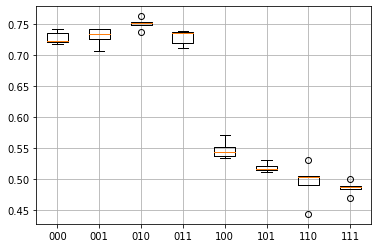

In [10]:
#박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([acc_000,acc_001,acc_010,acc_011,acc_100,acc_101,acc_110,acc_111], labels=["000","001","010","011","100","101","110","111"])

프로그램 6-10의 교차 검증으로 제거 조사에서 가장 성능이 좋았던  Data augmentation을 사용하여
CIFAR-10 데이터에 대하여 epoch 수를 100번으로 늘린 상태로
Model accuracy와 Model loss에 대한 그래프와 정확률을 제시해주세요

In [12]:
#신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax',kernel_regularizer=regularizers.l2(0.0)))

#신경망을 학습하고 정확률 평가
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist = cnn.fit(x_train, y_train,batch_size = batch_siz, epochs=100, validation_data=(x_test,y_test), verbose=2)

Epoch 1/100
391/391 - 8s - loss: 1.6764 - accuracy: 0.3811 - val_loss: 1.3697 - val_accuracy: 0.5084
Epoch 2/100
391/391 - 6s - loss: 1.2801 - accuracy: 0.5405 - val_loss: 1.1112 - val_accuracy: 0.6051
Epoch 3/100
391/391 - 6s - loss: 1.1249 - accuracy: 0.5982 - val_loss: 1.0283 - val_accuracy: 0.6331
Epoch 4/100
391/391 - 6s - loss: 1.0151 - accuracy: 0.6404 - val_loss: 0.9002 - val_accuracy: 0.6842
Epoch 5/100
391/391 - 7s - loss: 0.9283 - accuracy: 0.6750 - val_loss: 0.8478 - val_accuracy: 0.7065
Epoch 6/100
391/391 - 6s - loss: 0.8671 - accuracy: 0.6963 - val_loss: 0.7897 - val_accuracy: 0.7250
Epoch 7/100
391/391 - 6s - loss: 0.8117 - accuracy: 0.7151 - val_loss: 0.7583 - val_accuracy: 0.7332
Epoch 8/100
391/391 - 6s - loss: 0.7748 - accuracy: 0.7279 - val_loss: 0.7364 - val_accuracy: 0.7400
Epoch 9/100
391/391 - 6s - loss: 0.7375 - accuracy: 0.7389 - val_loss: 0.7083 - val_accuracy: 0.7498
Epoch 10/100
391/391 - 7s - loss: 0.7022 - accuracy: 0.7538 - val_loss: 0.6717 - val_accura

정확률은 80.40000200271606


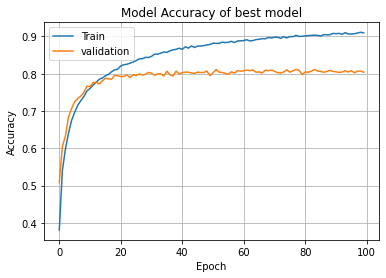

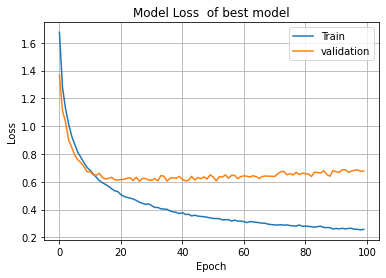

In [13]:
res=cnn.evaluate(x_test, y_test, verbose=0)
print("정확률은", res[1]*100)

#정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy of best model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc='best')
plt.grid()
plt.show()

#손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss  of best model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc='best')
plt.grid()
plt.show()